# What is scikit-learn?  

Scikit-learn is a package of Python's machine learning tool-kit, it creates based on Numpy, Scipy, and Matplotlib.  

Scikit-learn provide four main category of classic models -- classification, regression, clustering, and dimension reduction.  
* The size of data is better to be larger than 50.  
* If the data has label, use classification model.  
* If the result need to predict value, use regression model.  
* If want to know data distribution, use clustering model.  
* If the data doesn't have label, use dimension reduction.  

Document: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)  

# Datasets

### 1. load toy datasets  

Scikit-learn provides many kinds of buid-in datasets, we can use keys to see the content of the datasets.  

* load_iris: iris dataset
* load_diabetes: diabetes dataset
* load_digits: hand-written digit dataset
* load_linnerud: exercise and physiology dataset
* load_wine: wine dataset
* load_breast_cancer: Wisconsin's breast cancer dataset

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.keys())
print(data["target_names"])
print(data["feature_names"])
print(data["data"].shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


### 2. fetch real world datasets  

To the large scale datasets, scikit-learn provides another type of function to get the datasets.  

* fetch_olivetti_faces: face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge
* fetch_20newsgroups: around 18,000 newsgroups posts on 20 topics
* fetch_20newsgroups_vectorized: verctorized data of around 18,000 newsgroups posts on 20 topics
* fetch_lfw_people: collections of JPEG pictures of famous people collected over the internet 
* fetch_lfw_pairs: collections of JPEG pictures of pairs of famous people collected over the internet
* fetch_covtype: forest covertypes correspond to 30mx30m patchs of forest in the US
* fetch_rcv1: Reuters Corpus Volume I(RCV I) is an archive of over 800,000 manually categorized newswire stories made available.
* fetch_kddcup99: tcpdump dataset
* fetch_california_housing: California housing dataset

In [2]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()
print(data.keys())
print(data["target"])
print(data["images"])
print(data["data"].shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 3

### 3. make datasets  

Scikit-learn can also generate data by build-in function.  

* Single label
  - make_circles: produce Gaussian data with a spherical decision boundary for binary classification
  - make_moon: produce two interleaving half circles
  - make_blobs: provide greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering
  - make_classification: specialize in introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space
  - make_gaussian_quantiles: divide a single Gaussian cluster into near-equal-size classes separated by concentric hyperspheres
  - make_hastie_10_2: generate a similar binary, 10-dimensional problem
* Multilabel
  - make_multilabel_classification: generate random samples with multiple labels
* Biclustering
  - make_regression: produce regression targets as an optionally-sparse random linear combination of random features, with noise
  - make_sparse_uncorrelated: produce a target as a linear combination of four features with fixed coefficients
  - make_friedman1: related by polynomial and sine transforms
  - make_friedman2: include feature multiplication and reciprocation
  - make_friedman3: similar with an arctan transformation on the target
* Generators for manifold learning
  - make_s_curve: generate an S curve dataset
  - make_swiss_roll: generate a swiss roll dataset
* Generators for decomposition
  - make_low_rank_matrix: generate a mostly low rank matrix with vell-shaped singular values
  - make_sparse_coded_signal: generate s signal as a sparse combination of dictionary elements
  - make_spd_matrix: generate a random symmetric, positive-definite matrix
  - make_sparse_spd_matrix: generate a sparse symmetric definite positive matrix

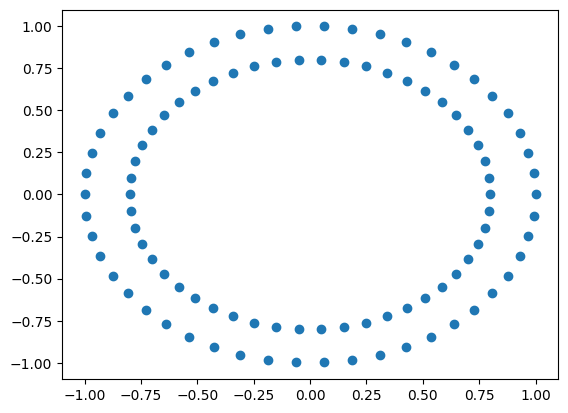

In [5]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

data = make_circles()[0]
plt.scatter(data[:, 0], data[:, 1])

# Classification

### 1. KNeighborsClassifier  

Find most nearest k samples in the data and assign the most frequent category.

* Pro: the model doesn't need to train
* Con: the value of K need to assigned, and the algorithm time complexity is high

Parameters:  
* n_neighbors(int) (<font color="ff0000">default = 5</font>)  
&ensp;&ensp;number of neighbors to query neighbors  
* weights("uniform", "distance" or `user-defined function`) (<font color="ff0000">default = "uniform"</font>)  
  - "uniform": all points in each neighborshood are weighted equally  
  - "distance": closer neighbors have greater influence  
  - `user-defined function`: use a `user-defined function` to calculate the weight of each neighbors  
* algorithm("ball_tree", "kd_tree", "brute", or "auto") (<font color="ff0000">default = "auto"</font>)  
  - "ball_tree": use sklearn.neighbors.BallTree  
  - "kd_tree": use sklearn.neighbors.KDTree  
  - "brute": use a brute-force search  
  - "auto": decide the most appropriate algorithm based on the values passed to fit method  
* leaf_size(int) (<font color="ff0000">default = 30</font>)  
&ensp;&ensp;leaf size passed to BallTree or KDTree
* p(float) (<font color="ff0000">default = 2</font>)  
&ensp;&ensp;power parameter for Minkowski metric  
  - 1: use manhattan distance  
  - 2: use minkowski distance  
* metric(str or `user-defined function`) (<font color="ff0000">default = "minkowski"</font>)  
&ensp;&ensp;metric to use for distance computation  
  - "minkowski": standard Euclidean distance  
  - "precomputed": assumed to be a distance matrix and must be square during fit  
  - use-defined function: takes two arrays representing 1D vectors as inputs and must return one value indicating the distance between those vectors  
* metric_params(dict) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;additional keyword argument for metric function
* n_jobs(int)  (<font color="ff0000">default = None</font>)  
&ensp;&ensp;the number of parallel jobs to run for neighbors search
  - None: means 1 unless in a joblib.parallel_backend context  
  - -1: means using all processors  

In [6]:
from sklearn.neighbors import KNeighborsClassifier

x = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x, y)
print(model.predict([[1.1]]))
print(model.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


### 2. LogisticRegression

A linear regression analysis model, find a line nearest to the sample.  

* Pro: the model is simple, and we can use gradient descend to do incremental training  
* Con: easily influence by noise  

Parameters:  
* penalty(None, "l1", "l2", or "elasticent") (<font color="ff0000">default = "l2"</font>)  
  - None: no penalty  
  - l1: add a L1 penalty term  
  - l2: add a L2 penalty term
  - elasticent: both L1 and L2 penalty terms are added  
* dual(bool) (<font color="ff0000">default = False</font>)  
&ensp;&ensp;dual or primal formulation  
* tol(float) (<font color="ff0000">default = 1e-4</font>)  
&ensp;&ensp;tolerance for stopping criteria  
* C(float) (<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;inverse of regularization strength <font color="007733">(must be a positive float)</font> <font color="007733">(smaller value -> stronger regularization)</font>  
* fit_intercept(bool) (<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether a constant should be added to the decision function  
* intercept_scaling(float) (<font color="ff0000">default = 1</font>)  
&ensp;&ensp;useful when the `solver` "liblinear" is used and `self.fit_intercept` is set to <font color="ff0000">True</font>. In this case, <font color="0000ff">x</font> becomes <font color="0000ff">[x, `self.intercept_scaling`]</font>  
* class_weight(dict or "balanced") (<font color="ff0000">default = None</font>)  
  - None: all classes are supposed to have weight 1  
  - dict: weights associated with classes in the form {<font color="0000ff">class_label</font>: <font color="0000ff">weight</font>}  
  - balanced: `n_samples` / (`n_classes` * `np.bincount(y)`)  
* random_state(int, RandomState instance) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;If `solver` is "sag", "saga", or "liblinear", then shuffle the data.  
* solver("lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", or "saga") (<font color="ff0000">default = "lbfgs"</font>)  
  - lbfgs: handle multinomial loss  
  - liblinear: better for small datasets; limited to on-versus-rest schemes  
  - newton-cg: handle multinomial loss
  - newton-cholesky: better for `n_samples` >> `n_features`  
  - sag: faster for large datasets; handle multinomial loss  
  - saga: faster for large datasets; handle multinomial loss  
* max_iter(int) (<font color="ff0000">default = 100</font>)  
&ensp;&ensp;naximum number of iterations taken for the `solvers` to converge  
* multi_class("auto", "ovr", or "multinomial") (<font color="ff0000">default = "auto"</font>)  
  - auto: select `ovr` if the data is binary or if the `solver` = "liblinear"; otherwise select "multinomial"  
  - ovr: a binary problem is fot for each label  
  - multinomial: the loss minimised is the multinomial loss fot across the entire probability distribution, even when the data is binary<font color="">(`multinomial` is unavailable when `solver` = "liblinear")</font>  
* verbose(int) (<font color="ff0000">default: 0</font>)  
  - for the "liblinear" and "lbfga" `solvers` set verbose to any positive number for verbosity  
* warm_start(bool) (<font color="ff0000">default = False</font>)  
  - True: reuse the solution of the previois call to fit an initialization  
  - False: just erase the previous solution  
* n_jobs(int) (<font color="ff0000">default = None</font>)  
  - `multi_class` = "ovr": number of CPU used when parallelizing over classes  
  - `solver` = "liblinear": ignored `n_jobs`  
  - None: use 1 CPU  
  - -1: use all processors  
* l1_ratio(float) (<font color="ff0000">default = None</font>)  
  - `l1_ratio` = 0: `penalty` = "l1"  
  - 0 < `l1_ratio` < 1: the penalty is a comination of "l1" and "l2"  
  - `l1_ratio` = 1: `penalty` = "l2"  

In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

x, y = load_iris(return_X_y = True)
model = LogisticRegression(max_iter = 500)
model.fit(x, y)

print(model.predict(x[: 2, :]))
print(model.predict_proba(x[: 2, :]))
print(model.score(x, y))

[0 0]
[[9.81583498e-01 1.84164879e-02 1.44944143e-08]
 [9.71337522e-01 2.86624479e-02 3.01808128e-08]]
0.9733333333333334
